In [104]:

# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter  # Import PercentFormatter
import seaborn as sns
from datetime import datetime
from time import time
import warnings
warnings.filterwarnings("ignore")
import os
from scipy import stats
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.constraints import max_norm
from sklearn import model_selection, preprocessing, metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split




In [74]:
# Import data: https://archive.ics.uci.edu/dataset/2/adult

# Fetch the dataset
adult = pd.read_csv("adult.csv")
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [75]:
#
# Data information
# 3 columns with null values to be treated

print(adult.info())
adult.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


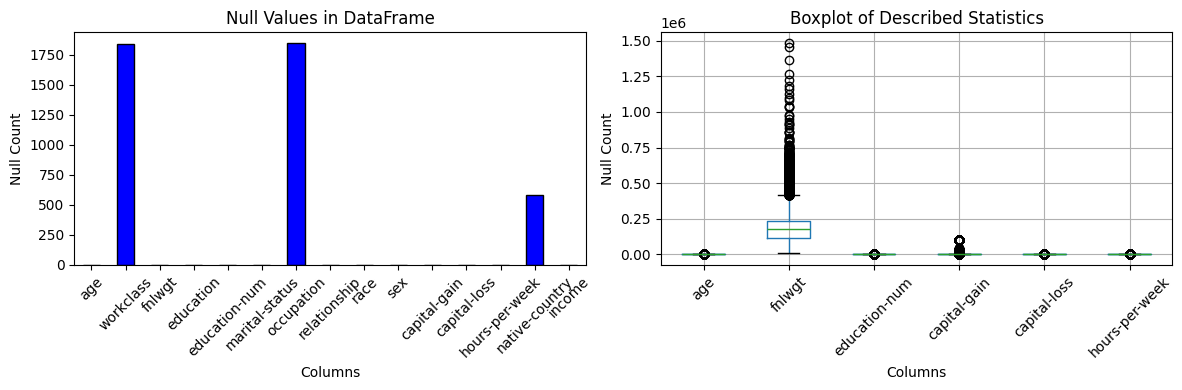

In [76]:

# Null data visualization

# Create a bar plot for null values
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# plt.figure(figsize=(8, 6))
adult.isna().sum().plot(kind='bar', color='b', edgecolor='black',ax=axes[0])
# plt.title('Null Values in DataFrame')
# plt.xlabel('Columns')
# plt.ylabel('Null Count')
# plt.xticks(rotation=45)
axes[0].set_title('Null Values in DataFrame')
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Null Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)


# Create boxplot for numerical data
numerical_df = adult.select_dtypes(include=int)
# plt.figure(figsize=(10, 6))
numerical_df.boxplot(ax=axes[1])
axes[1].set_title('Boxplot of Described Statistics')
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Null Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
# plt.set_title('Boxplot of Described Statistics')
# plt.ylabel('Value')
# plt.xticks(rotation=45)a
plt.tight_layout()

plt.show()


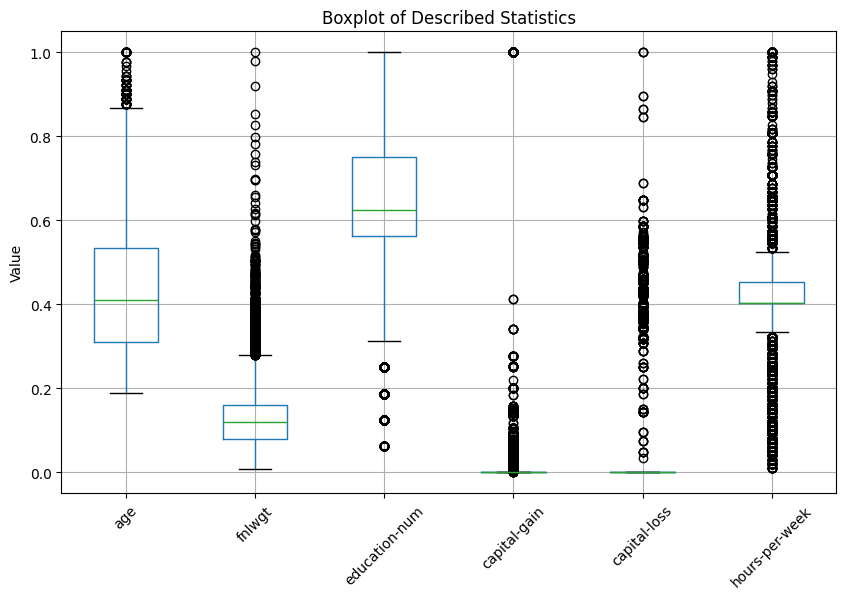

In [77]:
# We can see that the boxplot's visualization is bad due to 
# fnlwgt, with much greater values and more extreme outliers
# NORMALIZAÇÃO [0,1]

for col, max_val in numerical_df.max().items():
    numerical_df[col] /= max_val
plt.figure(figsize=(10, 6))
numerical_df.boxplot()
plt.title('Boxplot of Described Statistics')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

# Conclusions: education and age are far more sparse, whereas capital gain/loss and hours per week are have a clear concentration


In [78]:
adult = adult.apply(lambda x:x.fillna(x.value_counts().index[0]))
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


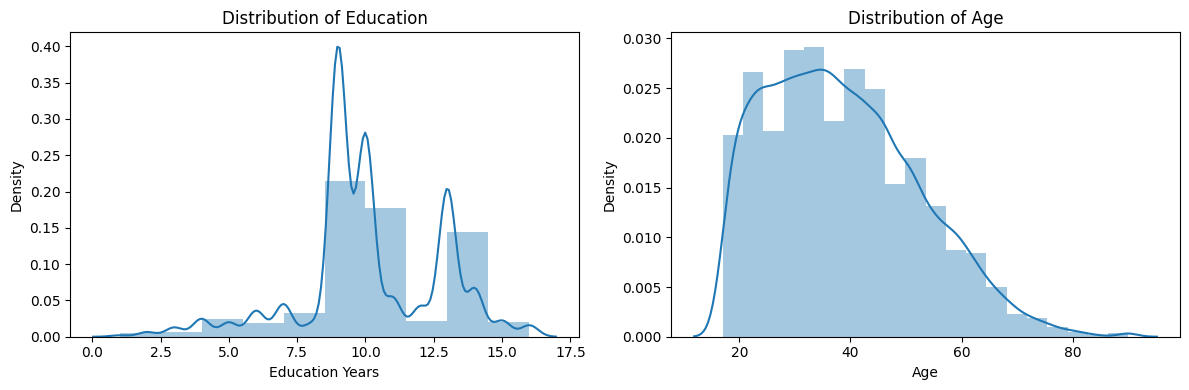

In [79]:

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first distribution on the left subplot
sns.distplot(adult['education-num'], bins=10, ax=axes[0])
axes[0].set_title('Distribution of Education')
axes[0].set_xlabel('Education Years')
axes[0].set_ylabel('Density')

# Plot the second distribution on the right subplot
sns.distplot(adult['age'], bins=20, ax=axes[1])
axes[1].set_title('Distribution of Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Density')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()


In [80]:

# Calculate common statistical metrics
data = adult.age
mean = np.mean(data)
median = np.median(data)
mode = stats.mode(data)
std_dev = np.std(data)
variance = np.var(data)
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data)


# Display the metrics in a table format
print("===== Statistical Metrics - Age =====")
print("---------------------")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode.mode} (with frequency {mode.count})")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

===== Statistical Metrics - Age =====
---------------------
Mean: 38.58164675532078
Median: 37.0
Mode: 36 (with frequency 898)
Standard Deviation: 13.640223092304275
Variance: 186.05568600783081
Skewness: 0.5587176292398571
Kurtosis: -0.16628621434407442


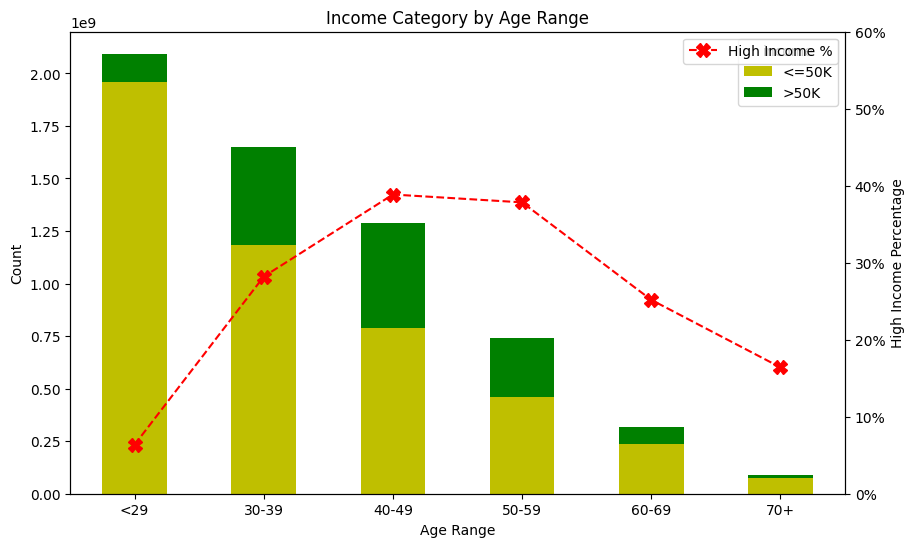

In [81]:
# Age x income relationship
# Define age ranges
bins = [10, 30, 40, 50, 60, 70,1000]  # Adjust as needed
age_ranges = ['<29', '30-39', '40-49', '50-59', '60-69', '70+']

# Create a new column 'age_range' based on age bins
adult['age_range'] = pd.cut(adult['age'], bins=bins, labels=age_ranges)

grouped = adult.groupby(['age_range', 'income']).fnlwgt.agg('sum').unstack().fillna(0)
grouped['Percentage'] = grouped['>50K'] / (grouped['<=50K']+grouped['>50K'])

# Create a stacked bar chart
ax1 = grouped.drop('Percentage', axis=1).plot(kind='bar', stacked=True, color=['y', 'g'], figsize=(10, 6))

# Customize the plot
plt.title('Income Category by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=0)
# Add the second y-axis for High income percentage
ax2 = ax1.twinx()
ax2.plot(grouped.index, grouped['Percentage'], marker='X', markersize=10, color='red', linestyle='--', label='High Income %')

# Customize the second y-axis
ax2.set_ylabel('High Income Percentage')
ax2.set_ylim(0, 0.6)  # Set the y-axis limits between 0% and 60%
ax2.yaxis.set_major_formatter(PercentFormatter(1))
ax2.legend(loc='upper right')

# Show the plot
plt.show()


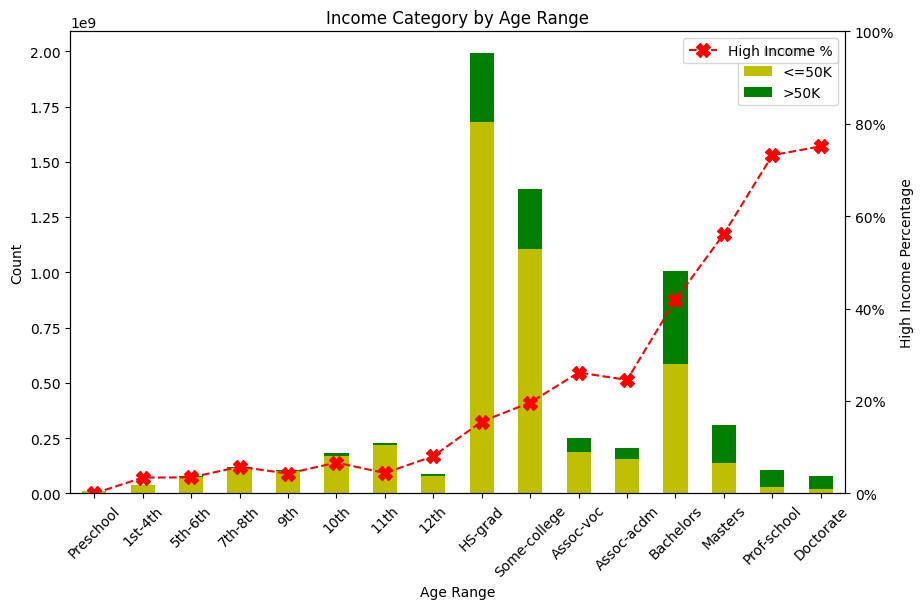

In [82]:
# Education x income relationship

custom_order = adult.groupby('education')['education-num'].agg('mean').sort_values().index
grouped = adult.groupby(['education', 'income']).fnlwgt.agg('sum').unstack().fillna(0)
grouped['Percentage'] = grouped['>50K'] / (grouped['<=50K']+grouped['>50K'])
grouped = grouped.reindex(custom_order)
# Create a stacked bar chart
ax1 = grouped.drop('Percentage', axis=1).plot(kind='bar', stacked=True, color=['y', 'g'], figsize=(10, 6))

# Customize the plot
plt.title('Income Category by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
# Add the second y-axis for High income percentage
ax2 = ax1.twinx()
ax2.plot(grouped.index, grouped['Percentage'], marker='X', markersize=10, color='red', linestyle='--', label='High Income %')

# Customize the second y-axis
ax2.set_ylabel('High Income Percentage')
ax2.set_ylim(0, 1)  # Set the y-axis limits between 0% and 60%
ax2.yaxis.set_major_formatter(PercentFormatter(1))
ax2.legend(loc='upper right')

# Show the plot
plt.show()


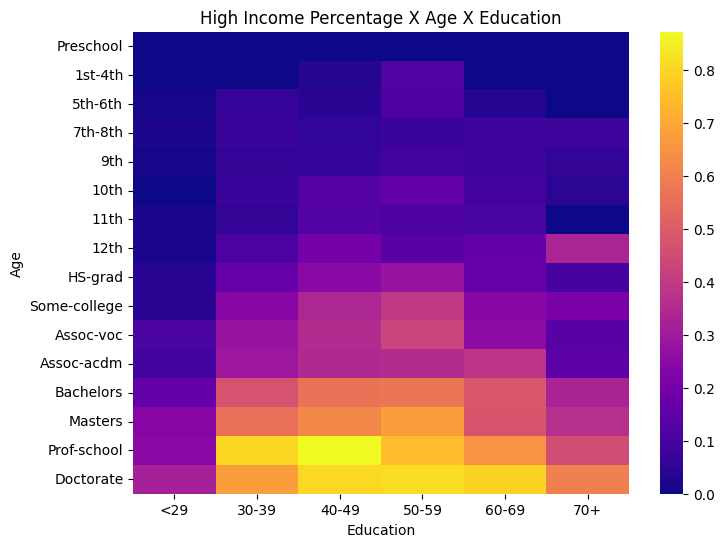

In [83]:

# Heatmap education x 

rich = adult[adult.income=='>50K']
freq_rich = pd.crosstab(rich.education, rich.age_range).fillna(0)
freq_total = pd.crosstab(adult.education, adult.age_range).fillna(0)
freq_percent = freq_rich / freq_total
freq_percent = freq_percent.fillna(0).reindex(custom_order)

plt.figure(figsize=(8, 6))
sns.heatmap(freq_percent, annot=False, cmap='plasma')

# Customize the plot
plt.title('High Income Percentage X Age X Education')
plt.xlabel('Education')
plt.ylabel('Age')

# Show the heatmap
plt.show()

 

In [84]:
adult.drop('age_range', axis=1, inplace=True)
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [92]:
# Encode Data
adult.workclass.replace(('Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked'),(1,2,3,4,5,6,7,8), inplace=True)
adult.education.replace(('Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16), inplace=True)
adult['marital-status'].replace(('Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'),(1,2,3,4,5,6,7), inplace=True)
adult.occupation.replace(('Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14), inplace=True)
adult.relationship.replace(('Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried'),(1,2,3,4,5,6), inplace=True)
adult.race.replace(('White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black'),(1,2,3,4,5), inplace=True)
adult.sex.replace(('Female', 'Male'),(1,2), inplace=True)
adult['native-country'].replace(('United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41), inplace=True)
adult.income.replace(('<=50K', '>50K'),(0,1), inplace=True)

In [93]:
print("Correlation:", adult.corr(method='pearson'))

Correlation:                      age  workclass    fnlwgt  education  education-num  \
age             1.000000   0.120120 -0.076646   0.121298       0.036527   
workclass       0.120120   1.000000 -0.025539   0.031184       0.179696   
fnlwgt         -0.076646  -0.025539  1.000000   0.019530      -0.043195   
education       0.121298   0.031184  0.019530   1.000000      -0.247453   
education-num   0.036527   0.179696 -0.043195  -0.247453       1.000000   
marital-status -0.220938  -0.062327  0.024079  -0.013268      -0.107648   
occupation      0.020916   0.123245  0.003738   0.011172      -0.037530   
relationship    0.128919   0.016223  0.014773   0.031089      -0.031898   
race           -0.029869   0.030044  0.098406   0.009120      -0.078799   
sex             0.088832   0.002228  0.026858   0.034275       0.012280   
capital-gain    0.077674   0.016367  0.000432   0.019884       0.122630   
capital-loss    0.057775   0.023900 -0.010252   0.016923       0.079923   
hours-per-we

In [95]:
dataset = adult.values

X = dataset[:,0:14]
Y = dataset[:,14] 

In [96]:
# Split Data to Train and Test
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3)
print("X_Train: ", X_Train.shape)
print("X_Test: ", X_Test.shape)
print("Y_Train: ", Y_Train.shape)
print("Y_Test: ", Y_Test.shape)

X_Train:  (22792, 14)
X_Test:  (9769, 14)
Y_Train:  (22792,)
Y_Test:  (9769,)


In [102]:
# create model
model = Sequential()
model.add(Dense(28, input_dim=14, activation='relu', kernel_initializer="uniform"))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu', kernel_constraint=max_norm(3), kernel_initializer="uniform"))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu', kernel_initializer="uniform"))
model.add(Dense(1, activation='sigmoid', kernel_initializer="uniform"))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_Train, Y_Train, epochs=300, batch_size=10)

# Evaluate the model
scores = model.evaluate(X_Test, Y_Test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/300
2280/2280 [==============================] - 1s 508us/step - loss: 0.5479 - accuracy: 0.7803
Epoch 2/300
2280/2280 [==============================] - 1s 499us/step - loss: 0.5097 - accuracy: 0.7932
Epoch 3/300
2280/2280 [==============================] - 1s 498us/step - loss: 0.5011 - accuracy: 0.7934
Epoch 4/300
2280/2280 [==============================] - 1s 506us/step - loss: 0.4965 - accuracy: 0.7957
Epoch 5/300
2280/2280 [==============================] - 1s 496us/step - loss: 0.4975 - accuracy: 0.7962
Epoch 6/300
2280/2280 [==============================] - 1s 494us/step - loss: 0.4973 - accuracy: 0.7966
Epoch 7/300
2280/2280 [==============================] - 1s 521us/step - loss: 0.4967 - accuracy: 0.7959
Epoch 8/300
2280/2280 [==============================] - 1s 571us/step - loss: 0.4963 - accuracy: 0.7970
Epoch 9/300
2280/2280 [==============================] - 1s 523us/step - loss: 0.4989 - accuracy: 0.7942
Epoch 10/300
2280/2280 [==============================]

In [105]:
# Make predictions on the test data
Y_Pred = model.predict(X_Test)

# Convert predicted probabilities to binary predictions
Y_Pred_Binary = (Y_Pred > 0.5)

# Print classification report
print("Classification Report:")
print(classification_report(Y_Test, Y_Pred_Binary))

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_Test, Y_Pred)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)


306/306 [==============================] - 0s 318us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      7428
           1       0.95      0.18      0.31      2341

    accuracy                           0.80      9769
   macro avg       0.87      0.59      0.60      9769
weighted avg       0.83      0.80      0.75      9769

AUC: 0.6267017418189991


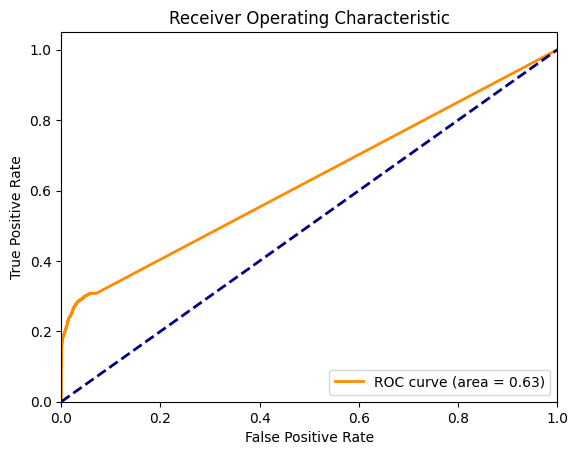

In [106]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()